In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
                    
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download the dataset
data_wta = pd.read_csv('../../data/train_data/wta_train.csv', low_memory=False)
data_wta.head()

,WTA,Location,Tournament,Date,Tier,Court,Surface,Round,p1_name,p2_name,p1_rank,p2_rank,p1_Pts,p2_Pts,PS_p1_odd,PS_p2_odd,Max_p1_odd,Max_p2_odd,Avg_p1_odd,Avg_p2_odd,p1_hand,p1_height,p2_hand,p2_height,result,p1_form_last_5,p2_form_last_5,p1_form_last_30days,p2_form_last_30days,p1_age,p2_age
0,20,Fes,Grand Prix de SAR La Princesse Lalla Meryem,2010-04-26,International,Outdoor,Clay,1st Round,Rogowska O.,Benesova I.,151.0,67.0,388.0,965.0,6.92,1.14,7.0,1.17,5.39,1.13,R,175.0,L,170.0,0,0.2,0.4,0.0,0.5,18.9,27.2
1,20,Fes,Grand Prix de SAR La Princesse Lalla Meryem,2010-04-26,International,Outdoor,Clay,1st Round,Benesova I.,Rogowska O.,67.0,151.0,965.0,388.0,1.14,6.92,1.17,7.0,1.13,5.39,L,170.0,R,175.0,1,0.4,0.2,0.5,0.0,27.2,18.9
2,20,Fes,Grand Prix de SAR La Princesse Lalla Meryem,2010-04-27,International,Outdoor,Clay,1st Round,Coin J.,Keothavong A.,79.0,111.0,827.0,575.0,2.07,1.88,2.2,1.88,2.03,1.73,R,172.0,R,175.0,0,0.2,0.4,0.0,0.0,27.4,26.6
3,20,Fes,Grand Prix de SAR La Princesse Lalla Meryem,2010-04-27,International,Outdoor,Clay,1st Round,Arn G.,Schnyder P.,241.0,47.0,212.0,1430.0,4.26,1.26,4.5,1.26,4.16,1.21,R,180.0,L,168.0,0,0.0,0.4,0.0,0.5,31.1,31.4
4,20,Fes,Grand Prix de SAR La Princesse Lalla Meryem,2010-04-27,International,Outdoor,Clay,1st Round,Martic P.,Cornet A.,65.0,84.0,978.0,800.0,2.11,1.83,2.11,2.1,1.87,1.86,R,181.0,R,173.0,0,0.4,0.2,0.0,0.0,19.3,20.3


In [3]:
data_wta.shape

(47818, 31)

# Dataset Preparation

In [4]:
data_wta.dtypes

WTA                      int64
Location                object
Tournament              object
Date                    object
Tier                    object
Court                   object
Surface                 object
Round                   object
p1_name                 object
p2_name                 object
p1_rank                float64
p2_rank                float64
p1_Pts                 float64
p2_Pts                 float64
PS_p1_odd              float64
PS_p2_odd              float64
Max_p1_odd              object
Max_p2_odd              object
Avg_p1_odd             float64
Avg_p2_odd             float64
p1_hand                 object
p1_height              float64
p2_hand                 object
p2_height              float64
result                   int64
p1_form_last_5         float64
p2_form_last_5         float64
p1_form_last_30days    float64
p2_form_last_30days    float64
p1_age                 float64
p2_age                 float64
dtype: object

In [5]:
# Convert the 'Max_p1_odd' and 'Max_p2_odd' columns to numeric format, replacing non-numeric values with NaN
data_wta['Max_p1_odd'] = pd.to_numeric(data_wta['Max_p1_odd'], errors='coerce')
data_wta['Max_p2_odd'] = pd.to_numeric(data_wta['Max_p2_odd'], errors='coerce')
data_wta.dropna(inplace=True)  # Remove rows with NaN values
data_wta[['Max_p1_odd', 'Max_p2_odd']].dtypes

Max_p1_odd    float64
Max_p2_odd    float64
dtype: object

In [6]:
data_wta.shape

(47816, 31)

In [7]:
# Finding the minimum and maximum values for each column
min_values = data_wta.select_dtypes(exclude=['object']).min()
max_values = data_wta.select_dtypes(exclude=['object']).max()

# Displaying the results
print("Minimum values in each column:\n", min_values)
print("Maximum values in each column:\n", max_values)


Minimum values in each column:
 WTA                      1.00
p1_rank                  1.00
p2_rank                  1.00
p1_Pts                   1.00
p2_Pts                   1.00
PS_p1_odd                1.01
PS_p2_odd                1.01
Max_p1_odd               1.01
Max_p2_odd               1.01
Avg_p1_odd               1.01
Avg_p2_odd               1.01
p1_height              153.00
p2_height              153.00
result                   0.00
p1_form_last_5           0.00
p2_form_last_5           0.00
p1_form_last_30days      0.00
p2_form_last_30days      0.00
p1_age                  13.00
p2_age                  13.00
dtype: float64
Maximum values in each column:
 WTA                       60.00
p1_rank                 1876.00
p2_rank                 1876.00
p1_Pts                 13615.00
p2_Pts                 13615.00
PS_p1_odd                 51.00
PS_p2_odd                 51.00
Max_p1_odd               127.00
Max_p2_odd               127.00
Avg_p1_odd                31.29
A

In [8]:
data_wta[data_wta['Max_p1_odd']==127.0]   # Incorrect data

,WTA,Location,Tournament,Date,Tier,Court,Surface,Round,p1_name,p2_name,p1_rank,p2_rank,p1_Pts,p2_Pts,PS_p1_odd,PS_p2_odd,Max_p1_odd,Max_p2_odd,Avg_p1_odd,Avg_p2_odd,p1_hand,p1_height,p2_hand,p2_height,result,p1_form_last_5,p2_form_last_5,p1_form_last_30days,p2_form_last_30days,p1_age,p2_age
24782,5,Sydney,Apai International,2017-01-10,Premier,Outdoor,Hard,2nd Round,Wozniacki C.,Putintseva Y.,20.0,34.0,2135.0,1450.0,1.27,4.24,127.0,4.35,1.24,4.01,R,177.0,R,163.0,1,0.6,0.4,0.75,0.5,26.5,22.0


In [9]:
# Remove rows where 'Max_p1_odd' or 'Max_p2_odd' have a value of 127.0, as they are incorrect data
data_wta = data_wta.drop(data_wta[(data_wta['Max_p1_odd']==127.0) | (data_wta['Max_p2_odd']==127.0)].index)
data_wta.reset_index(drop=True, inplace=True)
data_wta.shape

(47814, 31)

In [10]:
data_wta['Max_p1_odd'].max().item()

101.0

In [11]:
# Shuffle the rows
data_wta = data_wta.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
# We are not interested in the columns 'WTA', 'Date', 'Location', 'Tournament', 'p1_name', and 'p2_name',
# so we will remove them from the dataset.
data_wta.drop(['WTA', 'Date', 'Location', 'Tournament', 'p1_name', 'p2_name'], axis=1, inplace=True)
data_wta.tail(3)

,Tier,Court,Surface,Round,p1_rank,p2_rank,p1_Pts,p2_Pts,PS_p1_odd,PS_p2_odd,Max_p1_odd,Max_p2_odd,Avg_p1_odd,Avg_p2_odd,p1_hand,p1_height,p2_hand,p2_height,result,p1_form_last_5,p2_form_last_5,p1_form_last_30days,p2_form_last_30days,p1_age,p2_age
47811,WTA500,Outdoor,Clay,2nd Round,52.0,33.0,1558.0,1960.0,1.94,1.94,1.96,2.20,1.79,2.02,R,175.0,R,180.0,1,0.6,0.6,0.50,0.50,28.5,19.6
47812,Grand Slam,Outdoor,Grass,2nd Round,60.0,3.0,1085.0,5780.0,5.92,1.18,6.20,1.24,5.29,1.15,R,175.0,R,177.0,0,0.4,0.8,0.57,0.86,22.8,25.3
47813,International,Outdoor,Clay,Quarterfinals,166.0,112.0,376.0,553.0,3.28,1.40,3.40,1.41,3.08,1.36,R,163.0,R,169.0,1,0.6,0.6,1.00,1.00,24.2,19.7


In [13]:
data_wta.dtypes

Tier                    object
Court                   object
Surface                 object
Round                   object
p1_rank                float64
p2_rank                float64
p1_Pts                 float64
p2_Pts                 float64
PS_p1_odd              float64
PS_p2_odd              float64
Max_p1_odd             float64
Max_p2_odd             float64
Avg_p1_odd             float64
Avg_p2_odd             float64
p1_hand                 object
p1_height              float64
p2_hand                 object
p2_height              float64
result                   int64
p1_form_last_5         float64
p2_form_last_5         float64
p1_form_last_30days    float64
p2_form_last_30days    float64
p1_age                 float64
p2_age                 float64
dtype: object

In [17]:
# Print the unique values for each of categorical columns    
for column in data_wta.select_dtypes(include=['object']).columns:
    print(f"{column}:  {data_wta[column].unique()}\n")

Tier:  ['Grand Slam' 'International' 'WTA250' 'Premier' 'WTA500' 'WTA1000'
 'Tour Championships']

Court:  ['Outdoor' 'Indoor']

Surface:  ['Grass' 'Hard' 'Clay']

Round:  ['2nd Round' 'Semifinals' '1st Round' 'Quarterfinals' '3rd Round'
 'The Final' '4th Round' 'Round Robin']

p1_hand:  ['R' 'L']

p2_hand:  ['L' 'R']



In [18]:
# One-hot encoding for categorical variables
data_wta = pd.get_dummies(data_wta, columns=['Court', 'p1_hand', 'p2_hand'], dtype=int, drop_first=True)
data_wta.tail(3)

,Tier,Surface,Round,p1_rank,p2_rank,p1_Pts,p2_Pts,PS_p1_odd,PS_p2_odd,Max_p1_odd,Max_p2_odd,Avg_p1_odd,Avg_p2_odd,p1_height,p2_height,result,p1_form_last_5,p2_form_last_5,p1_form_last_30days,p2_form_last_30days,p1_age,p2_age,Court_Outdoor,p1_hand_R,p2_hand_R
47811,WTA500,Clay,2nd Round,52.0,33.0,1558.0,1960.0,1.94,1.94,1.96,2.20,1.79,2.02,175.0,180.0,1,0.6,0.6,0.50,0.50,28.5,19.6,1,1,1
47812,Grand Slam,Grass,2nd Round,60.0,3.0,1085.0,5780.0,5.92,1.18,6.20,1.24,5.29,1.15,175.0,177.0,0,0.4,0.8,0.57,0.86,22.8,25.3,1,1,1
47813,International,Clay,Quarterfinals,166.0,112.0,376.0,553.0,3.28,1.40,3.40,1.41,3.08,1.36,163.0,169.0,1,0.6,0.6,1.00,1.00,24.2,19.7,1,1,1


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Label encoding for those categorical variables that have more than two unique values
lb = LabelEncoder()

cat_cols = ['Tier', 'Surface', 'Round'] # dtype == 'object'

for col in cat_cols:

    data_wta[col] = lb.fit_transform(data_wta[col])
    data_wta[col] = data_wta[col].astype(int)

    print(f"Column: {col}")
    print("Original values -> Transformed values:")
    for original, encoded in zip(lb.classes_, lb.transform(lb.classes_)):
        print(f"{original} -> {int(encoded)}")
    print()

Column: Tier
Original values -> Transformed values:
Grand Slam -> 0
International -> 1
Premier -> 2
Tour Championships -> 3
WTA1000 -> 4
WTA250 -> 5
WTA500 -> 6

Column: Surface
Original values -> Transformed values:
Clay -> 0
Grass -> 1
Hard -> 2

Column: Round
Original values -> Transformed values:
1st Round -> 0
2nd Round -> 1
3rd Round -> 2
4th Round -> 3
Quarterfinals -> 4
Round Robin -> 5
Semifinals -> 6
The Final -> 7



In [21]:
data_wta.tail(3)

,Tier,Surface,Round,p1_rank,p2_rank,p1_Pts,p2_Pts,PS_p1_odd,PS_p2_odd,Max_p1_odd,Max_p2_odd,Avg_p1_odd,Avg_p2_odd,p1_height,p2_height,result,p1_form_last_5,p2_form_last_5,p1_form_last_30days,p2_form_last_30days,p1_age,p2_age,Court_Outdoor,p1_hand_R,p2_hand_R
47811,6,0,1,52.0,33.0,1558.0,1960.0,1.94,1.94,1.96,2.20,1.79,2.02,175.0,180.0,1,0.6,0.6,0.50,0.50,28.5,19.6,1,1,1
47812,0,1,1,60.0,3.0,1085.0,5780.0,5.92,1.18,6.20,1.24,5.29,1.15,175.0,177.0,0,0.4,0.8,0.57,0.86,22.8,25.3,1,1,1
47813,1,0,4,166.0,112.0,376.0,553.0,3.28,1.40,3.40,1.41,3.08,1.36,163.0,169.0,1,0.6,0.6,1.00,1.00,24.2,19.7,1,1,1


In [22]:
# Creating new columns to represent the difference between numeric variables for each player

data_wta['rank_diff'] = data_wta['p1_rank'] - data_wta['p2_rank']
data_wta['pts_diff'] = data_wta['p1_Pts'] - data_wta['p2_Pts']
data_wta['PS_odds_diff'] = data_wta['PS_p1_odd'] - data_wta['PS_p2_odd']
data_wta['Max_odds_diff'] = data_wta['Max_p1_odd'] - data_wta['Max_p2_odd']
data_wta['Avg_odds_diff'] = data_wta['Avg_p1_odd'] - data_wta['Avg_p2_odd']
data_wta['ht_diff'] = data_wta['p1_height'] - data_wta['p2_height']
data_wta['form_5m_diff'] = data_wta['p1_form_last_5'] - data_wta['p2_form_last_5']
data_wta['form_30d_diff'] = data_wta['p1_form_last_30days'] - data_wta['p2_form_last_30days']
data_wta['age_diff'] = data_wta['p1_age'] - data_wta['p2_age']

In [23]:
data_wta.tail()

,Tier,Surface,Round,p1_rank,p2_rank,p1_Pts,p2_Pts,PS_p1_odd,PS_p2_odd,Max_p1_odd,Max_p2_odd,Avg_p1_odd,Avg_p2_odd,p1_height,p2_height,result,p1_form_last_5,p2_form_last_5,p1_form_last_30days,p2_form_last_30days,p1_age,p2_age,Court_Outdoor,p1_hand_R,p2_hand_R,rank_diff,pts_diff,PS_odds_diff,Max_odds_diff,Avg_odds_diff,ht_diff,form_5m_diff,form_30d_diff,age_diff
47809,2,0,1,38.0,10.0,1440.0,3545.0,5.00,1.21,5.50,1.22,4.44,1.20,173.0,172.0,0,0.4,0.4,0.50,0.33,27.4,29.1,1,1,1,28.0,-2105.0,3.79,4.28,3.24,1.0,0.0,0.17,-1.7
47810,0,0,3,132.0,14.0,529.0,2420.0,2.34,1.68,2.46,1.68,2.29,1.63,176.0,185.0,0,0.8,0.8,1.00,0.86,26.7,27.0,1,1,0,118.0,-1891.0,0.66,0.78,0.66,-9.0,0.0,0.14,-0.3
47811,6,0,1,52.0,33.0,1558.0,1960.0,1.94,1.94,1.96,2.20,1.79,2.02,175.0,180.0,1,0.6,0.6,0.50,0.50,28.5,19.6,1,1,1,19.0,-402.0,0.00,-0.24,-0.23,-5.0,0.0,0.00,8.9
47812,0,1,1,60.0,3.0,1085.0,5780.0,5.92,1.18,6.20,1.24,5.29,1.15,175.0,177.0,0,0.4,0.8,0.57,0.86,22.8,25.3,1,1,1,57.0,-4695.0,4.74,4.96,4.14,-2.0,-0.4,-0.29,-2.5
47813,1,0,4,166.0,112.0,376.0,553.0,3.28,1.40,3.40,1.41,3.08,1.36,163.0,169.0,1,0.6,0.6,1.00,1.00,24.2,19.7,1,1,1,54.0,-177.0,1.88,1.99,1.72,-6.0,0.0,0.00,4.5


In [24]:
# Remove columns we do not need anymore
data_wta.drop(['p1_rank', 'p2_rank', 'p1_Pts', 'p2_Pts', 'PS_p1_odd', 'PS_p2_odd',
               'Max_p1_odd', 'Max_p2_odd', 'Avg_p1_odd', 'Avg_p2_odd', 'p1_height', 
               'p2_height', 'p1_form_last_5', 'p2_form_last_5', 'p1_form_last_30days', 
               'p2_form_last_30days', 'p1_age', 'p2_age'], axis=1, inplace=True)
data_wta.tail(3)

,Tier,Surface,Round,result,Court_Outdoor,p1_hand_R,p2_hand_R,rank_diff,pts_diff,PS_odds_diff,Max_odds_diff,Avg_odds_diff,ht_diff,form_5m_diff,form_30d_diff,age_diff
47811,6,0,1,1,1,1,1,19.0,-402.0,0.00,-0.24,-0.23,-5.0,0.0,0.00,8.9
47812,0,1,1,0,1,1,1,57.0,-4695.0,4.74,4.96,4.14,-2.0,-0.4,-0.29,-2.5
47813,1,0,4,1,1,1,1,54.0,-177.0,1.88,1.99,1.72,-6.0,0.0,0.00,4.5


In [25]:
data_wta['rank_diff'] = data_wta['rank_diff'].astype(int)
data_wta['pts_diff'] = data_wta['pts_diff'].astype(int)
data_wta['ht_diff'] = data_wta['ht_diff'].astype(int)

data_wta.dtypes

Tier               int64
Surface            int64
Round              int64
result             int64
Court_Outdoor      int64
p1_hand_R          int64
p2_hand_R          int64
rank_diff          int64
pts_diff           int64
PS_odds_diff     float64
Max_odds_diff    float64
Avg_odds_diff    float64
ht_diff            int64
form_5m_diff     float64
form_30d_diff    float64
age_diff         float64
dtype: object

In [26]:
data_wta.tail(3)

,Tier,Surface,Round,result,Court_Outdoor,p1_hand_R,p2_hand_R,rank_diff,pts_diff,PS_odds_diff,Max_odds_diff,Avg_odds_diff,ht_diff,form_5m_diff,form_30d_diff,age_diff
47811,6,0,1,1,1,1,1,19,-402,0.00,-0.24,-0.23,-5,0.0,0.00,8.9
47812,0,1,1,0,1,1,1,57,-4695,4.74,4.96,4.14,-2,-0.4,-0.29,-2.5
47813,1,0,4,1,1,1,1,54,-177,1.88,1.99,1.72,-6,0.0,0.00,4.5


# Find significant variables for prediction

#### Correlation heatmap

In [27]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,12)})
sns.set(font_scale = 1.15)

[Text(0.5, 1.0, 'Correlation heatmap')]

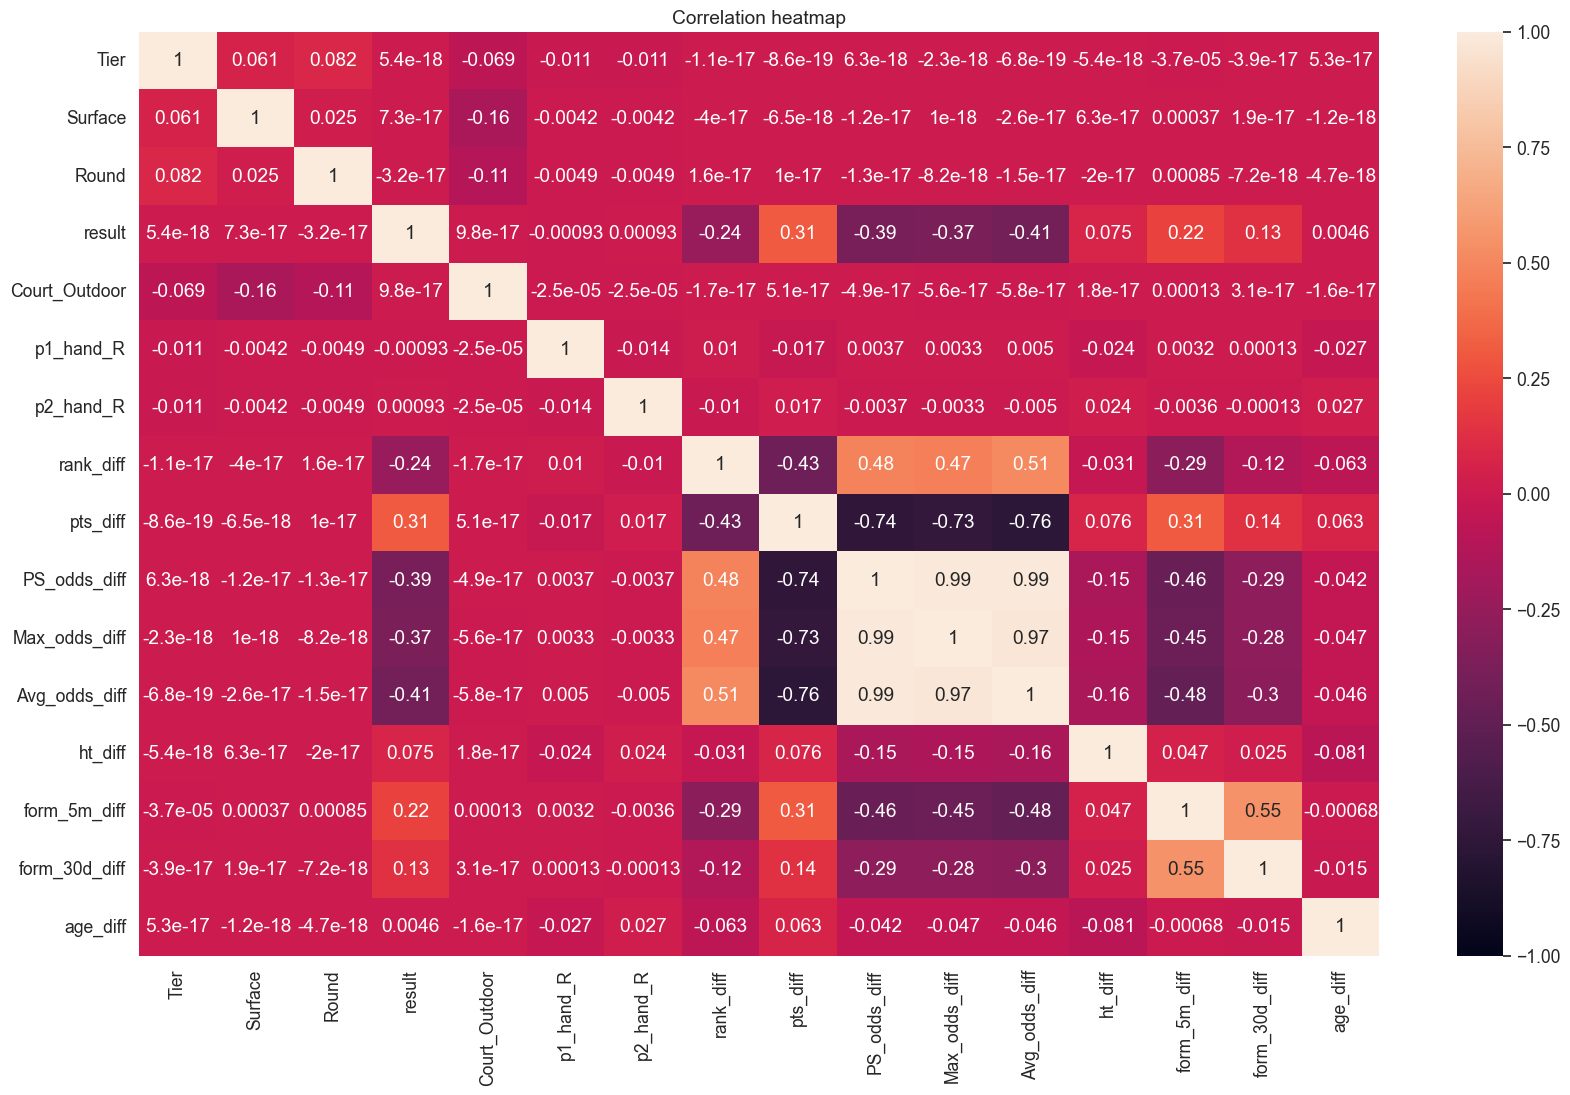

In [28]:
sns.heatmap(data_wta.corr(), vmin=-1, vmax=1, annot=True).set(title = 'Correlation heatmap')

#### Logistic regression (for binary classification) with p-values

In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [30]:
# Separate the features X and the target variable y
X = data_wta.drop('result', axis=1)
y = data_wta['result'] 

# Add constant to the model (for intercept term)
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

# Extract p-values from the result
p_values = result.pvalues

# Set a significance level
significance_level = 0.05

# Filter variables that are statistically significant
significant_vars = p_values[p_values < significance_level].index
print(f"Statistically significant variables: {significant_vars}")

Optimization terminated successfully.
         Current function value: 0.584908
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                47814
Model:                          Logit   Df Residuals:                    47798
Method:                           MLE   Df Model:                           15
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                  0.1562
Time:                        00:32:30   Log-Likelihood:                -27967.
converged:                       True   LL-Null:                       -33142.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.666e-05      0.066      0.000      1.000      -0.129       0.129
Tier          -9.811

In [31]:
data_wta1 = data_wta[['pts_diff', 'PS_odds_diff', 'Max_odds_diff', 'Avg_odds_diff',
       'age_diff', 'result']]

data_wta1.tail(3)

,pts_diff,PS_odds_diff,Max_odds_diff,Avg_odds_diff,age_diff,result
47811,-402,0.00,-0.24,-0.23,8.9,1
47812,-4695,4.74,4.96,4.14,-2.5,0
47813,-177,1.88,1.99,1.72,4.5,1


# Models

## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [33]:
# Separate the target variable (Y1) and the features (X1)
Y1 = data_wta1['result']
X1 = data_wta1.drop(['result'], axis = 1)
Y1.value_counts()

result
0    23907
1    23907
Name: count, dtype: int64

In [34]:
# Define the test sizes and minimization methods for the optimization process
size = [round(i, 2) for i in np.arange(0.1, 0.3, 0.05)]  # Different test set sizes (10% to 30%)
minimization_metod = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']   # Different solvers for logistic regression

for k in size:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = k, random_state=42)
    print(f'\ntest_size = {k}:\n')
    for i in minimization_metod:
        logreg = LogisticRegression(solver=i)  # Initialize the logistic regression model with the chosen solver
        logreg.fit(X_train, y_train)  # Fit the model with the training data
        y_pred = logreg.predict(X_test)  # Make predictions on the test set
        print(f'solver = {i}, accuracy = {round(accuracy_score(y_test, y_pred), 5)}')
        
# test_size=0.1 solver = liblinear


test_size = 0.1:

solver = lbfgs, accuracy = 0.69113
solver = liblinear, accuracy = 0.6926
solver = newton-cg, accuracy = 0.69113
solver = sag, accuracy = 0.67085
solver = saga, accuracy = 0.66604

test_size = 0.15:

solver = lbfgs, accuracy = 0.68632
solver = liblinear, accuracy = 0.68772
solver = newton-cg, accuracy = 0.68632
solver = sag, accuracy = 0.67141
solver = saga, accuracy = 0.66611

test_size = 0.2:

solver = lbfgs, accuracy = 0.68462
solver = liblinear, accuracy = 0.68556
solver = newton-cg, accuracy = 0.68483
solver = sag, accuracy = 0.66841
solver = saga, accuracy = 0.66266

test_size = 0.25:

solver = lbfgs, accuracy = 0.68329
solver = liblinear, accuracy = 0.68421
solver = newton-cg, accuracy = 0.68329
solver = sag, accuracy = 0.66731
solver = saga, accuracy = 0.66128


In [35]:
# Performing GridSearch
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.1, random_state=42)
# Initialize the logistic regression model
logreg = LogisticRegression(solver='liblinear')

grid = GridSearchCV(logreg, param_grid = {'fit_intercept': [True, False], \
                                          'C': [i for i in np.arange(1, 5, 0.25)], \
                                          'penalty': ['l1', 'l2']})

grid.fit(X_train, y_train)
best = grid.best_params_
best  # Show the best parameters


{'C': np.float64(1.25), 'fit_intercept': True, 'penalty': 'l1'}

Best parameters found: {'C': 1.25, 'fit_intercept': True, 'penalty': 'l1'}

In [45]:
# Refining logistic regression parameters found using GridSearchCV
logreg = LogisticRegression(solver='liblinear', fit_intercept=True, C=1.25, penalty='l1')

logreg.fit(X_train, y_train)  # Train the model using the training data

y_pred = logreg.predict(X_test)  # Make predictions on the test set
round(accuracy_score(y_test, y_pred), 5)

0.69092

In [37]:
def overfitting(model, X_test, y_test, X_train, y_train):
    """
    Evaluate model performance on test and training sets to check for overfitting.

    :param model: sklearn model - Trained model to evaluate.
    :param X_test: pd.DataFrame - Test set features.
    :param y_test: pd.Series - Test set target variable.
    :param X_train: pd.DataFrame - Training set features.
    :param y_train: pd.Series - Training set target variable.
    :return: pd.DataFrame - DataFrame with evaluation metrics for test and train sets.
    """
    # Lists to store evaluation metrics for test and train sets
    best_inter, best_C, acc, r_auc, f1, prec, rec, logl = ([] for i in range(8))

    # Scoring metrics to evaluate the model
    scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall', 'neg_log_loss']
    metrics_l = [acc, r_auc, f1, prec, rec, logl]

    # Evaluate the model on the test set using cross-validation
    for i in zip(metrics_l, scoring):
        el = cross_val_score(model, X_test, y_test, cv = 5, scoring = i[1])

        # Convert negative log loss to positive for better readability
        if i[1] == 'neg_log_loss':
            el = -1 * el

        i[0].append(el.mean())

    # Evaluate the model on the training set using cross-validation
    for k in zip(metrics_l, scoring):
        el = cross_val_score(model, X_train, y_train, cv = 5, scoring = k[1])

        if k[1] == 'neg_log_loss':
            el = -1 * el

        k[0].append(el.mean())

    # A dictionary to store test and train evaluation results
    dictt = {
             'Accuracy': acc, 
             'Precision': prec,
             'Recall': rec,
             'F1 score': f1,
             'Roc auc': r_auc,
             'Log loss': logl
            }

    result = pd.DataFrame(dictt, index = ['test', 'train'])

    return result.round(5)

In [46]:
overfitting(logreg, X_test, y_test, X_train, y_train)

,Accuracy,Precision,Recall,F1 score,Roc auc,Log loss
test,0.69135,0.69273,0.69673,0.69506,0.76286,0.57633
train,0.68377,0.68417,0.68284,0.68357,0.75428,0.58652


In [47]:
# Save Logistic Regression model
from joblib import dump
# dump(logreg, '../../models_to_use/logreg_wta.joblib')

['../../models_to_use/logreg_wta.joblib']

## MLP

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
# Create an MLPClassifier mode
mlp = MLPClassifier(max_iter=500, random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(32, 32), (100,), (128, 64, 32)],  # Different hidden layer configurations
    'activation': ['tanh', 'relu', 'logistic'],  # Activation functions
    'solver': ['adam', 'sgd', 'lbfgs'],  # Optimization algorithms
    'alpha': [0.0001, 0.005],  # L2 regularization strength
    'learning_rate': ['constant', 'adaptive', 'invscaling'],  # Learning rate strategies
}

# Configure Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=4, verbose=2)

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Retrieve the best model from Grid Search
best_mlp = grid_search.best_estimator_

Fitting 4 folds for each of 162 candidates, totalling 648 fits


/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=adam; total time=   7.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=sgd; total time=   5.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=sgd; total time=   4.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=lbfgs; total time= 2.7min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=adam; total time=  22.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=sgd; total time=  24.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=lbfgs; total time= 2.8min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=lbfgs; total time= 2.9mi

/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=adam; total time=  11.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=sgd; total time=   4.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=lbfgs; total time= 2.8min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=sgd; total time=  24.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=lbfgs; total time= 2.8min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=sgd; total time=   4.7s
inV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=lbfgs; total time= 2.7m

/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=adam; total time=  20.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=lbfgs; total time= 2.7min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=sgd; total time=  25.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=lbfgs; total time= 2.0min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=adam; total time=  21.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=adam; total time=   8.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=adam; total time=  12.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=sgd; total time=

/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=adam; total time=  19.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=constant, solver=lbfgs; total time= 2.0min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=adam; total time=  21.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=adam; total time=   8.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=adam; total time=  11.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=sgd; total time=  25.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=adaptive, solver=lbfgs; total time= 2.7min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=adam; total time=  22.

/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kirillshum/Library/Python/3.13/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=lbfgs; total time= 1.0min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32), learning_rate=invscaling, solver=lbfgs; total time=  18.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   9.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   9.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   8.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=  15.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time= 1.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   9.1s
[CV] 

Best parameters found:  {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'solver': 'lbfgs'}

In [48]:
# Initialize the MLPClassifier with the best-found hyperparameters
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(128, 64, 32), activation='logistic', alpha=0.001, max_iter=2000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)  # Make predictions on the test set
round(accuracy_score(y_test, y_pred), 5)

0.69364

In [49]:
# Check the overfitting
overfitting(mlp, X_test, y_test, X_train, y_train)

,Accuracy,Precision,Recall,F1 score,Roc auc,Log loss
test,0.69449,0.69220,0.70837,0.70012,0.76241,0.57679
train,0.68503,0.68468,0.68521,0.68491,0.75454,0.58487


In [50]:
# Save MLP model
# dump(mlp, '../../models_to_use/mlp_wta.pkl')

['../../models_to_use/mlp_wta.pkl']